# Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[104.   102.25 105.  ]
   [ 97.25  95.75  98.25]
   [102.   100.   103.  ]
   ...
   [ 17.25  13.75  12.25]
   [ 17.75  14.    12.5 ]
   [ 18.    14.25  12.75]]

  [[198.75 196.75 199.75]
   [197.5  195.5  198.5 ]
   [190.75 188.75 191.75]
   ...
   [ 29.75  26.75  21.75]
   [ 30.75  27.75  22.75]
   [ 31.25  28.25  23.25]]

  [[192.5  190.5  193.5 ]
   [197.75 195.75 198.75]
   [189.25 187.25 190.25]
   ...
   [ 30.25  27.25  22.25]
   [ 31.    28.    23.  ]
   [ 31.75  28.75  23.75]]

  ...

  [[147.5  136.   126.  ]
   [139.25 127.75 117.75]
   [128.   116.25 105.  ]
   ...
   [ 86.5   72.5   30.  ]
   [ 88.5   74.5   31.25]
   [105.5   91.    48.  ]]

  [[ 99.25  91.    81.5 ]
   [ 86.75  78.75  68.75]
   [ 82.    74.    63.  ]
   ...
   [100.5   82.25  35.  ]
   [109.    92.5   42.5 ]
   [145.5  129.5   79.  ]]

  [[ 92.25  91.25  79.25]
   [122.5  119.5  108.  ]
   [142.5  139.5  127.  ]
   ...
   [144.   123.    72.5 ]
   [146.75 129.    74.75]
   [152.5  137.5   7

### To avoid Overshooting
1. Choose small learning Rate default 0.001 we are taking 0.0001
2. There may be a chance of Underfitting, so increase number of neuron
3. Add more Convolution Layer to extract more feature from images there may be possiblity that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [8]:
model = Sequential()

## Building Convolution Model

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\KIIT\.conda\envs\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Dropout(0.25)) #To avoid Overfitting

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1500,activation='relu'))

In [17]:
model.add(Dropout(0.4))

In [18]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [21]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3013s 1s/step - accuracy: 0.3998 - loss: 2.1314 - val_accuracy: 0.8368 - val_loss: 0.5168
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2992s 1s/step - accuracy: 0.8369 - loss: 0.5159 - val_accuracy: 0.9041 - val_loss: 0.2893
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3198s 1s/step - accuracy: 0.9040 - loss: 0.2938 - val_accuracy: 0.9293 - val_loss: 0.2234
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2587s 1s/step - accuracy: 0.9371 - loss: 0.1940 - val_accuracy: 0.9334 - val_loss: 0.2176
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2708s 1s/step - accuracy: 0.9516 - loss: 0.1441 - val_accuracy: 0.9445 - val_loss: 0.1699
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3874s 2s/step - accuracy: 0.9659 - loss: 0.1062 - val_accuracy: 0.9302 - val_loss: 0.2341
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2685s 1s/step - accuracy: 0.9694 - loss: 0.0946 - val_accuracy: 0.9542 - val_loss: 0.1506
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1902s 866ms/step - accuracy: 0.975

## Model Evaluation

In [23]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1111s 506ms/step - accuracy: 0.9845 - loss: 0.0465


In [24]:
print(train_loss,train_acc)

0.04294136166572571 0.9860018491744995


In [25]:
#Model Evaluation on Validation Set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 275s 500ms/step - accuracy: 0.9601 - loss: 0.1305


In [26]:
print(val_loss,val_acc)

0.13719119131565094 0.9586842656135559


### Saving Model

In [27]:
model.save("trained_model.keras")

In [28]:
training_history.history

{'accuracy': [0.6016644239425659,
  0.8608435988426208,
  0.9137349724769592,
  0.9413898587226868,
  0.9553453326225281,
  0.9661568999290466,
  0.9713066220283508,
  0.9757593274116516,
  0.9805391430854797,
  0.9821040034294128],
 'loss': [1.353166937828064,
  0.4405827522277832,
  0.2639242708683014,
  0.18049240112304688,
  0.13485212624073029,
  0.1033339574933052,
  0.08642245084047318,
  0.07309066504240036,
  0.06162114068865776,
  0.055298108607530594],
 'val_accuracy': [0.8367857933044434,
  0.9040518999099731,
  0.9293193817138672,
  0.9333598613739014,
  0.9444571137428284,
  0.930229902267456,
  0.9541884660720825,
  0.9610744118690491,
  0.9647734761238098,
  0.9586842656135559],
 'val_loss': [0.5168229341506958,
  0.2892579436302185,
  0.2233508676290512,
  0.21759994328022003,
  0.16987980902194977,
  0.23411469161510468,
  0.1506400853395462,
  0.12863755226135254,
  0.1149459034204483,
  0.1371912956237793]}

In [29]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

### Accuracy Visualization

In [30]:
training_history.history['accuracy']

[0.6016644239425659,
 0.8608435988426208,
 0.9137349724769592,
 0.9413898587226868,
 0.9553453326225281,
 0.9661568999290466,
 0.9713066220283508,
 0.9757593274116516,
 0.9805391430854797,
 0.9821040034294128]

In [31]:
training_history.history['val_accuracy']

[0.8367857933044434,
 0.9040518999099731,
 0.9293193817138672,
 0.9333598613739014,
 0.9444571137428284,
 0.930229902267456,
 0.9541884660720825,
 0.9610744118690491,
 0.9647734761238098,
 0.9586842656135559]

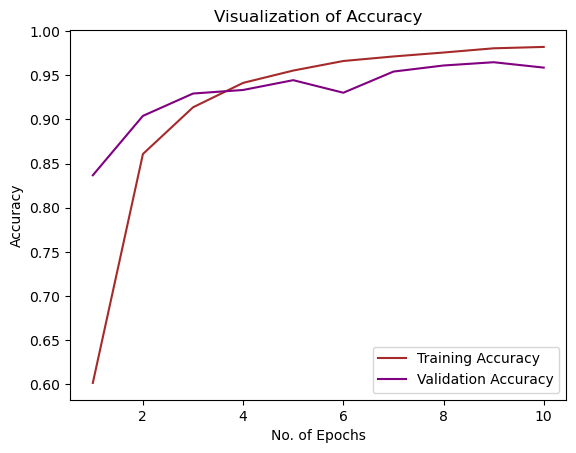

In [32]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='purple',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [33]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [34]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

Found 17572 files belonging to 38 classes.


In [35]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 253s 459ms/step


(array([[9.9962926e-01, 2.7125352e-06, 1.7098317e-08, ..., 4.2027496e-11,
         3.6163650e-13, 9.9693144e-12],
        [9.9983573e-01, 3.2278085e-09, 4.4258799e-10, ..., 8.7518256e-14,
         9.9772117e-16, 5.1086323e-15],
        [1.0000000e+00, 3.9289288e-10, 1.4829984e-11, ..., 1.3625269e-16,
         2.4316066e-18, 4.8467278e-16],
        ...,
        [2.2837945e-09, 4.9803204e-12, 5.7996936e-09, ..., 5.6039376e-08,
         1.9876326e-11, 9.9989605e-01],
        [3.0467323e-10, 1.4752800e-14, 1.8643484e-11, ..., 2.1530036e-09,
         1.8794128e-13, 9.9999988e-01],
        [2.3149604e-10, 1.2301840e-10, 4.1686516e-09, ..., 1.2688525e-09,
         1.2361146e-08, 9.9963784e-01]], dtype=float32),
 (17572, 38))

In [36]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [37]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [38]:
y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.91      0.94       504
                                 Apple___Black_rot       0.96      0.99      0.97       497
                          Apple___Cedar_apple_rust       0.97      0.99      0.98       440
                                   Apple___healthy       0.91      0.95      0.93       502
                               Blueberry___healthy       0.95      0.99      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.98      1.00      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.90      0.92       410
                       Corn_(maize)___Common_rust_       0.98      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.97      0.

In [41]:
cm = confusion_matrix(y_true,predicted_categories)
cm.shape
cm

array([[457,   7,   0, ...,   0,   0,   0],
       [  0, 494,   0, ...,   0,   0,   0],
       [  0,   0, 437, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 487,   0,   0],
       [  0,   0,   0, ...,   0, 440,   0],
       [  0,   0,   0, ...,   0,   0, 443]], dtype=int64)

### Confusion Matrix Visualization

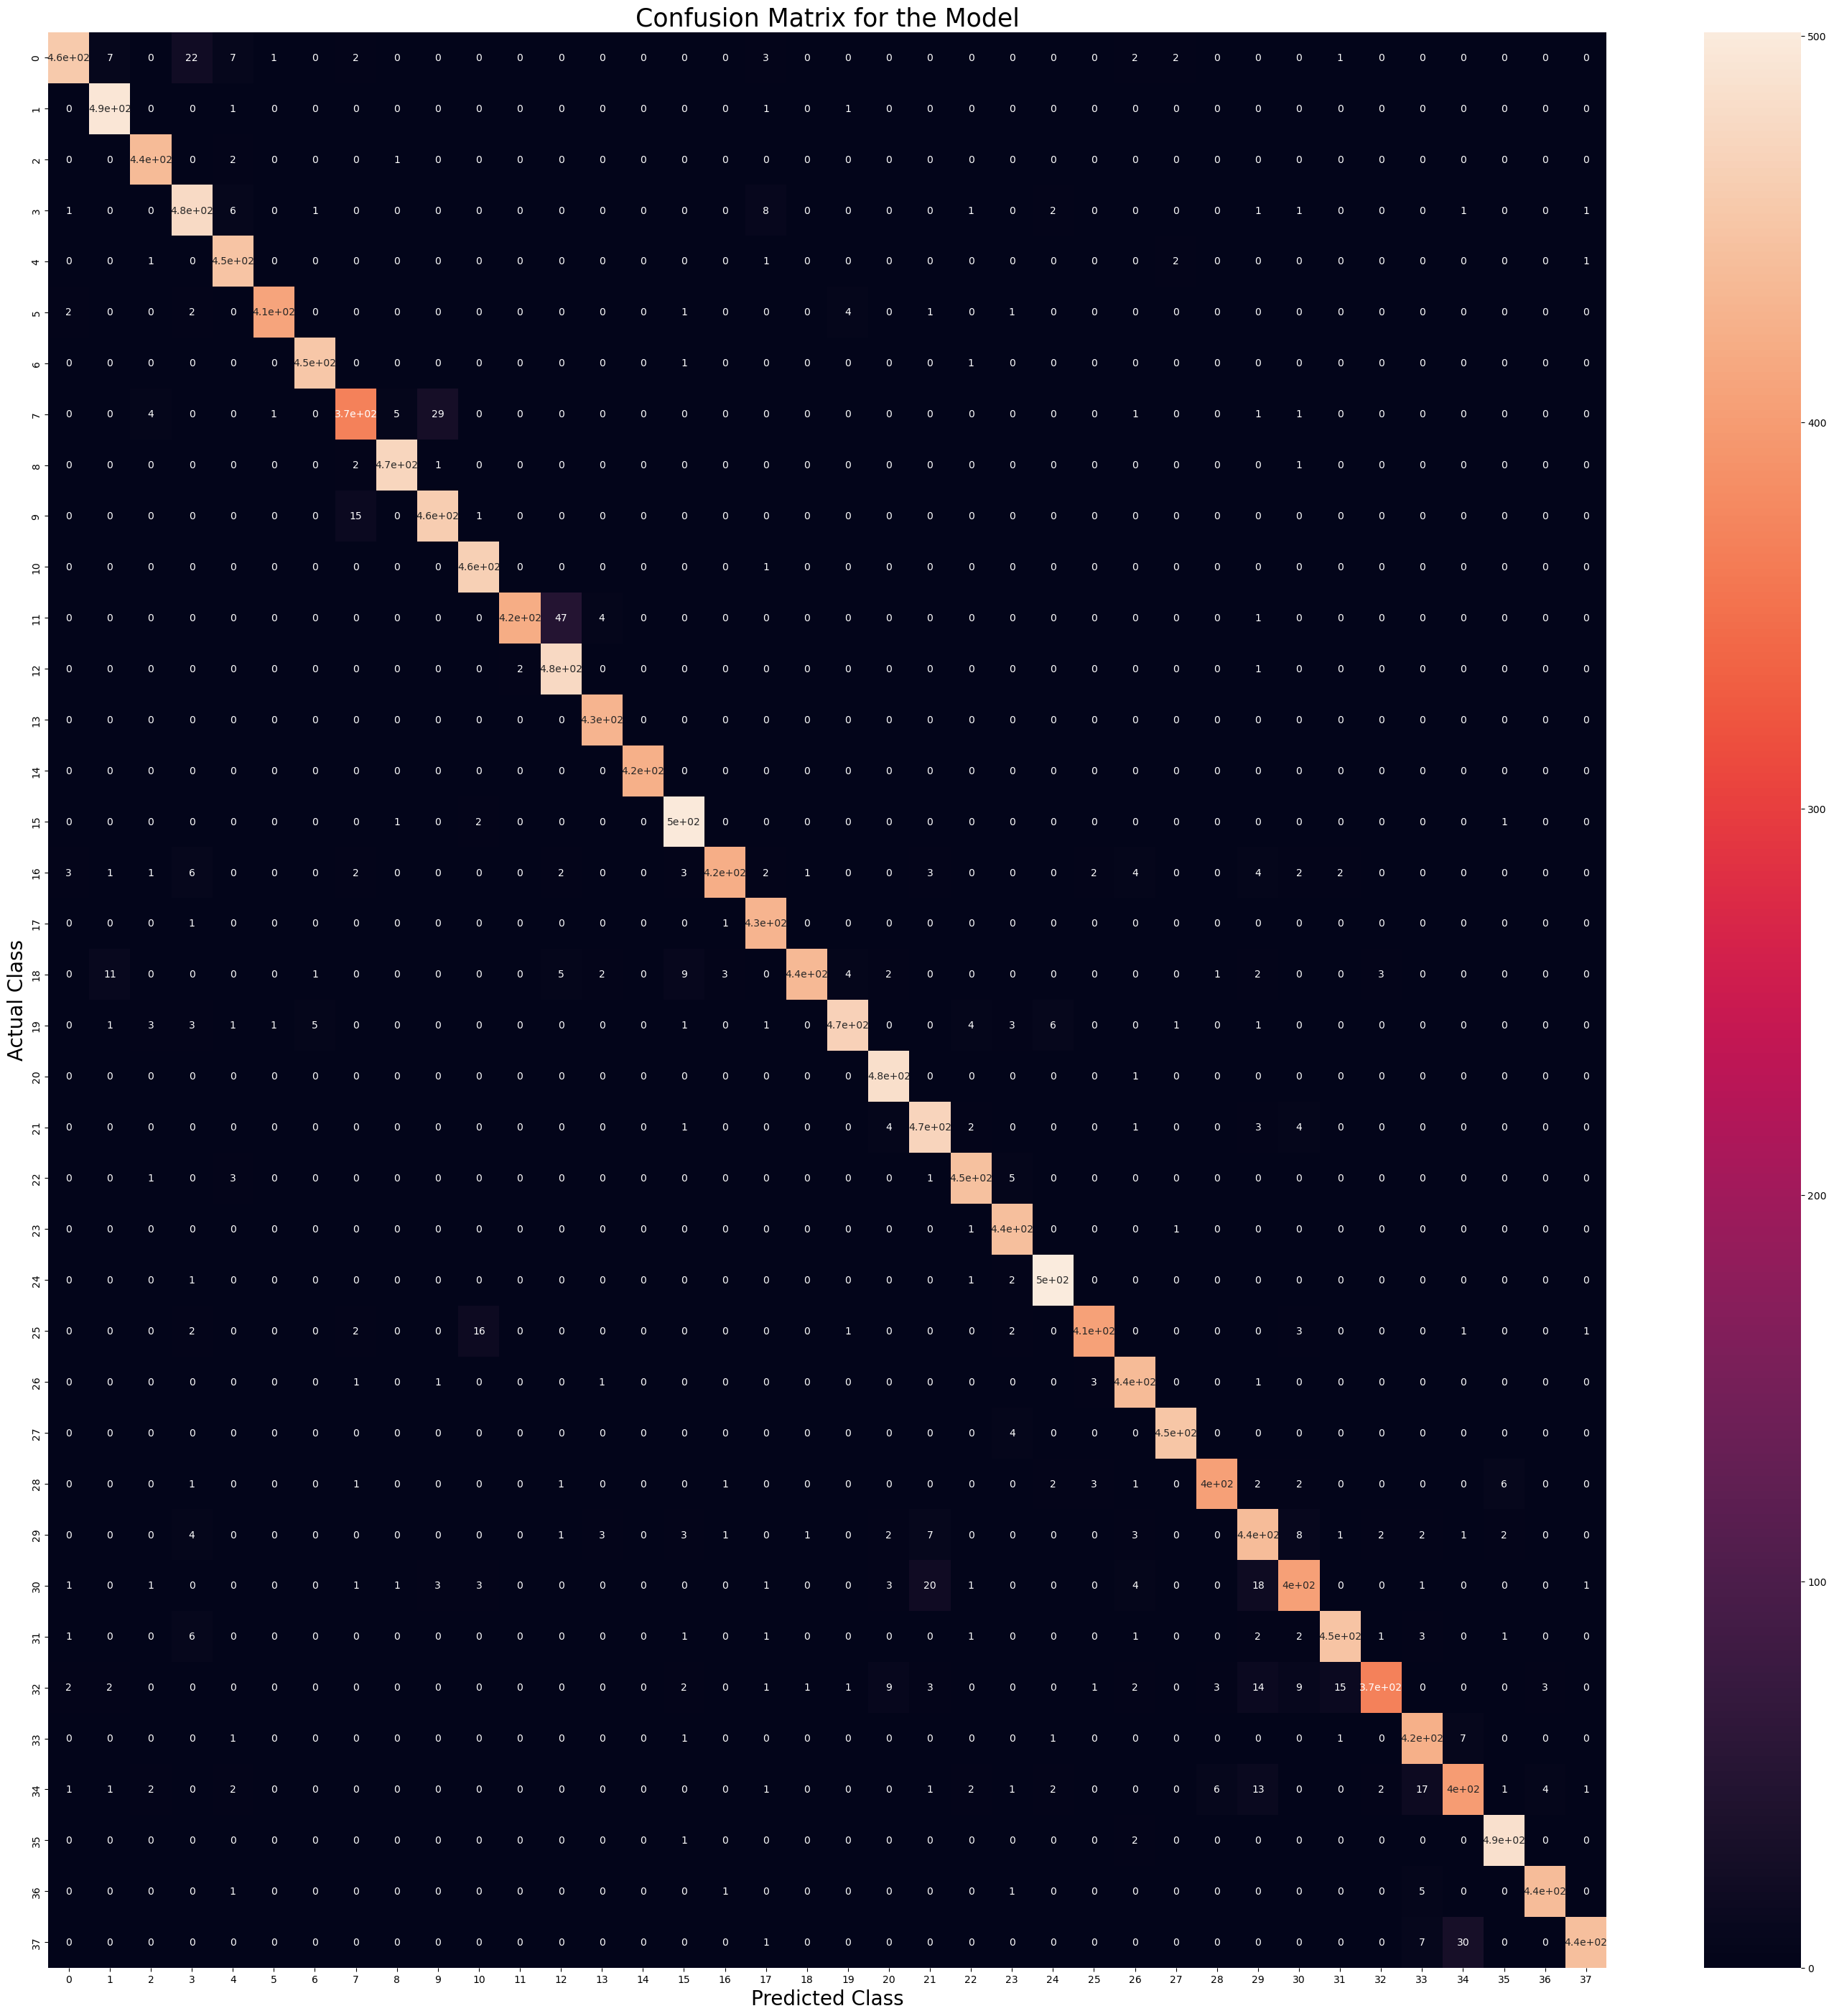

In [52]:
plt.figure(figsize=(35,35))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Confusion Matrix for the Model",fontsize=25)
plt.show()